# Research approach # 

I want to find out if there are any patterns in the trends that real estate prices and heading.
If there are any patters, can these patterns be exlained by different patterns or is it just the underlying time series trend.

The main parametrs that we are looking into include:
- Political affiliation
- Crime
- Asset appriciation
- Taxsation
- Risk mitigation
- Model development 

## I dentifying patterns in the data and political affiliation
I want to see if there are any patters that humans are not able to see using clustering. 

In [120]:
import os
import sys
import numpy as np  # Numerical computations
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Statistical data visualization
import plotly.express as px  # Interactive visualizations
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # Scaling and encoding
from sklearn.impute import SimpleImputer  # Handling missing values


In [121]:
# Load the CSV file into a DataFrame
df = pd.read_csv("Data/2016_2024_pricedata.csv")

# Display the first 5 rows
print(df.head())

   RegionID  SizeRank    RegionName RegionType  StateName     2000-01-31  \
0         9         0    California      state        NaN  186449.090913   
1        54         1         Texas      state        NaN  111018.278532   
2        14         2       Florida      state        NaN  105939.099867   
3        43         3      New York      state        NaN  150532.342593   
4        47         4  Pennsylvania      state        NaN   96695.081059   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  187075.801959  187922.015335  189758.892258  191893.984972  ...   
1  111078.608733  111107.869825  111253.095221  111347.145464  ...   
2  106168.573819  106446.741990  107012.186335  107621.957129  ...   
3  151068.385602  151584.413444  152694.249050  153842.532171  ...   
4   96901.904515   97096.263006   97492.336079   97899.202297  ...   

      2024-03-31     2024-04-30     2024-05-31     2024-06-30     2024-07-31  \
0  751372.268275  755206.460175  759664.12

In [122]:
df.drop("StateName", axis=1)

,RegionID,SizeRank,RegionName,RegionType,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,...,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31
0,9,0,California,state,186449.090913,187075.801959,187922.015335,189758.892258,191893.984972,194197.743808,...,751372.268275,755206.460175,759664.128050,762119.285892,764101.946106,765858.902416,768139.817461,769719.909003,771481.431234,773263.451715
1,54,1,Texas,state,111018.278532,111078.608733,111107.869825,111253.095221,111347.145464,111452.598683,...,301156.337588,302011.577853,302342.384240,302111.162485,301551.552917,301137.192876,300878.663198,300621.323932,300253.315889,299982.139510
2,14,2,Florida,state,105939.099867,106168.573819,106446.741990,107012.186335,107621.957129,108244.119799,...,392987.427789,393660.874166,393784.168515,393005.922425,391959.813824,390953.772856,390106.033410,389166.535852,387976.633622,386892.197619
3,43,3,New York,state,150532.342593,151068.385602,151584.413444,152694.249050,153842.532171,155084.143780,...,455999.732745,459623.866964,462954.983442,465633.483093,468137.717390,471201.874589,474034.562219,476427.532571,478239.595605,479975.705663
4,47,4,Pennsylvania,state,96695.081059,96901.904515,97096.263006,97492.336079,97899.202297,98317.350698,...,257837.322182,259484.525684,260951.427641,261824.643030,262157.675704,262404.295100,262785.747263,263518.744987,264393.449200,265564.886725
5,21,5,Illinois,state,124828.381038,124928.419372,125144.656720,125653.352226,126256.935346,126935.285770,...,254079.118701,256474.212359,258221.140984,259322.797252,259954.121403,260753.726099,261516.006549,262371.134191,263290.240157,264399.140053
6,44,6,Ohio,state,103304.588561,103367.717036,103463.454714,103744.975977,104174.225895,104706.835667,...,218688.309065,220675.104859,222470.430385,223682.825045,224489.676576,225065.645282,225467.238851,225946.216350,226572.741239,227781.809051
7,16,7,Georgia,state,122111.710995,122389.005574,122708.957209,123382.595841,124125.592421,124912.918712,...,322767.096787,324376.449267,325691.252304,326284.867696,326505.453534,326690.467020,326748.627133,326543.901135,325966.969051,325539.801900
8,36,8,North Carolina,state,126625.222584,126817.866492,127016.285849,127446.692481,127926.189386,128436.256545,...,323166.521593,324929.517284,326569.626042,327237.537617,327383.916467,327184.394483,327072.201839,327089.334764,327063.501938,327482.098953
9,30,9,Michigan,state,113111.645859,113173.945053,113402.026693,113856.364422,114526.379974,115262.258469,...,233445.237288,235671.956048,237269.909151,238207.736927,238501.942903,238789.493470,239035.585491,239617.959219,240243.796268,241165.159040


In [123]:
columns = df.columns[:4].tolist() + df.columns[-108:].tolist() # getting only data from 2016 to see how the us economy was moving
df = df[columns]
nan_columns = df.columns[df.isnull().any()] # the data only has one NAN and there is data from previous months and the following months in this case
nan_columns

Index(['2019-03-31'], dtype='object')

In [124]:
names, data = df.iloc[:,:4], df.iloc[:,4:]
data_columns = data.columns[-60:].tolist()
data2016, data2020 = data[data_columns], data.drop(data_columns, axis=1)

In [125]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data2016), columns=data2016.columns)
print(df_scaled.head())

   2020-01-31  2020-02-29  2020-03-31  2020-04-30  2020-05-31  2020-06-30  \
0    2.614781    2.606657    2.594500    2.584097    2.572922    2.561383   
1   -0.392779   -0.394477   -0.397398   -0.402235   -0.407325   -0.410254   
2   -0.112746   -0.109882   -0.110230   -0.115103   -0.120899   -0.123801   
3    0.806473    0.803648    0.797669    0.791051    0.791378    0.793939   
4   -0.631115   -0.631083   -0.631091   -0.629432   -0.629170   -0.630798   

   2020-07-31  2020-08-31  2020-09-30  2020-10-31  ...  2024-03-31  \
0    2.557734    2.563809    2.579363    2.598554  ...    2.699773   
1   -0.410333   -0.410601   -0.413795   -0.418815  ...   -0.409551   
2   -0.124336   -0.124337   -0.126885   -0.130591  ...    0.224661   
3    0.791052    0.777758    0.763356    0.752559  ...    0.659843   
4   -0.634355   -0.637705   -0.639202   -0.639505  ...   -0.708725   

   2024-04-30  2024-05-31  2024-06-30  2024-07-31  2024-08-31  2024-09-30  \
0    2.699083    2.706256    2.715055  

In [126]:
from sklearn.cluster import KMeans

# Apply K-means clustering (let's assume we want 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=32)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

print(df_scaled.head())

   2020-01-31  2020-02-29  2020-03-31  2020-04-30  2020-05-31  2020-06-30  \
0    2.614781    2.606657    2.594500    2.584097    2.572922    2.561383   
1   -0.392779   -0.394477   -0.397398   -0.402235   -0.407325   -0.410254   
2   -0.112746   -0.109882   -0.110230   -0.115103   -0.120899   -0.123801   
3    0.806473    0.803648    0.797669    0.791051    0.791378    0.793939   
4   -0.631115   -0.631083   -0.631091   -0.629432   -0.629170   -0.630798   

   2020-07-31  2020-08-31  2020-09-30  2020-10-31  ...  2024-04-30  \
0    2.557734    2.563809    2.579363    2.598554  ...    2.699083   
1   -0.410333   -0.410601   -0.413795   -0.418815  ...   -0.416794   
2   -0.124336   -0.124337   -0.126885   -0.130591  ...    0.213328   
3    0.791052    0.777758    0.763356    0.752559  ...    0.666847   
4   -0.634355   -0.637705   -0.639202   -0.639505  ...   -0.709183   

   2024-05-31  2024-06-30  2024-07-31  2024-08-31  2024-09-30  2024-10-31  \
0    2.706256    2.715055    2.725548  

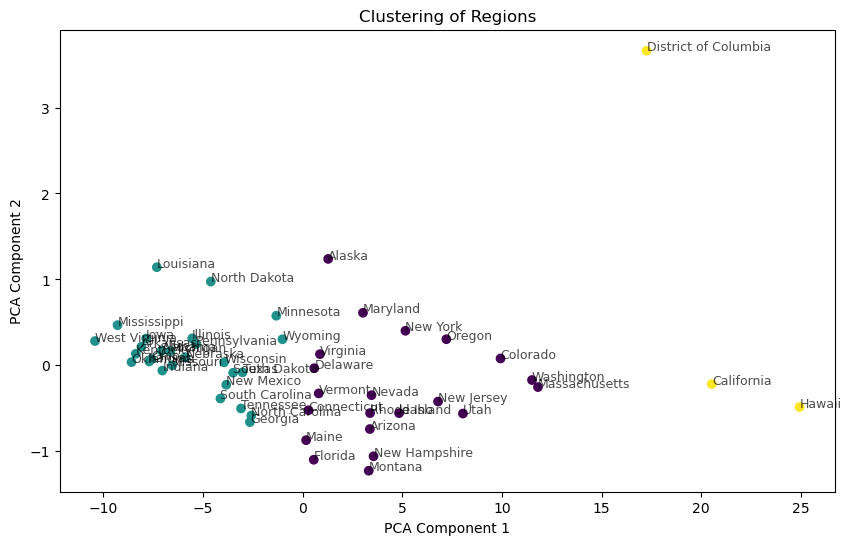

In [127]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions using PCA (2 components for 2D visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_scaled['Cluster'], cmap='viridis')

for i, region in enumerate(df['RegionName']):
    plt.annotate(region, (df_pca[i, 0], df_pca[i, 1]), fontsize=9, alpha=0.7)

plt.title('Clustering of Regions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

I pulled up the 2016 election results and stated seeing a pattern to see if that has anything to do with this.

In [128]:
custom_colors = ['red', 'blue', 'green', 'orange']

state_color_mapping = {
    'California': 'Blue',
    'Texas': 'Red',
    'Florida': 'Red',
    'New York': 'Blue',
    'Pennsylvania': 'Red',
    'Illinois': 'Purple',
    'Ohio': 'Red',
    'Georgia': 'Red',
    'North Carolina': 'Orange',
    'Michigan': 'Blue',
    'New Jersey': 'Purple',
    'Virginia': 'Blue',
    'Washington': 'Blue',
    'Arizona': 'Red',
    'Massachusetts': 'Blue',
    'Tennessee': 'Red',
    'Indiana': 'Red',
    'Maryland': 'Blue',
    'Missouri': 'Red',
    'Wisconsin': 'Blue',
    'Colorado': 'Blue',
    'Minnesota': 'Blue',
    'South Carolina': 'Red',
    'Alabama': 'Red',
    'Louisiana': 'Red',
    'Kentucky': 'Red',
    'Oregon': 'Blue',
    'Oklahoma': 'Red',
    'Connecticut': 'Purple',
    'Utah': 'Red',
    'Iowa': 'Red',
    'Nevada': 'Blue',
    'Arkansas': 'Red',
    'Mississippi': 'Red',
    'Kansas': 'Red',
    'New Mexico': 'Purple',
    'Nebraska': 'Red',
    'Idaho': 'Red',
    'West Virginia': 'Red',
    'Hawaii': 'Blue',
    'New Hampshire': 'Blue',
    'Maine': 'Blue',
    'Rhode Island': 'Blue',
    'Montana': 'Red',
    'Delaware': 'Purple',
    'South Dakota': 'Red',
    'North Dakota': 'Red',
    'Alaska': 'Red',
    'District of Columbia': 'Blue',
    'Vermont': 'Blue',
    'Wyoming': 'Red'
}

df['Color'] = df['RegionName'].map(state_color_mapping)
df.head()  # Just to check the first few rows

,RegionID,SizeRank,RegionName,RegionType,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,Color
0,9,0,California,state,419870.130840,425090.878889,431021.368540,435502.280230,438474.659693,441101.274823,...,755206.460175,759664.128050,762119.285892,764101.946106,765858.902416,768139.817461,769719.909003,771481.431234,773263.451715,Blue
1,54,1,Texas,state,171937.734784,173161.653763,174064.185315,174922.940533,175751.664229,176739.502967,...,302011.577853,302342.384240,302111.162485,301551.552917,301137.192876,300878.663198,300621.323932,300253.315889,299982.139510,Red
2,14,2,Florida,state,188061.142617,189405.897199,190642.030888,191951.389502,193247.113078,194632.254889,...,393660.874166,393784.168515,393005.922425,391959.813824,390953.772856,390106.033410,389166.535852,387976.633622,386892.197619,Red
3,43,3,New York,state,281360.224630,282051.672547,282364.627060,282923.916113,283781.986606,285112.736451,...,459623.866964,462954.983442,465633.483093,468137.717390,471201.874589,474034.562219,476427.532571,478239.595605,479975.705663,Blue
4,47,4,Pennsylvania,state,160071.920988,160563.599715,160604.170146,160597.073951,160791.291690,161286.486649,...,259484.525684,260951.427641,261824.643030,262157.675704,262404.295100,262785.747263,263518.744987,264393.449200,265564.886725,Red


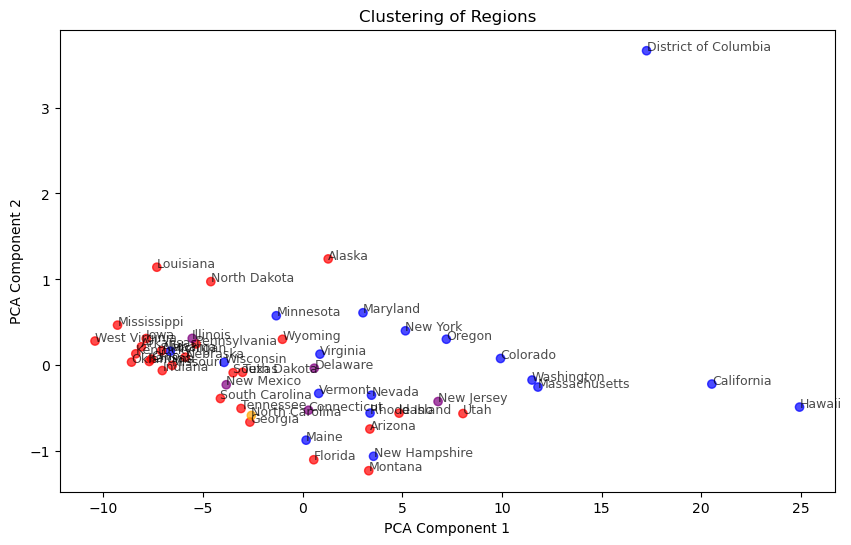

In [129]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have scaled the dataframe (df_scaled) and dropped the 'Cluster' column already

# Reduce dimensions using PCA (2 components for 2D visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

# Create a mapping for colors from df['Color'] (the colors should be 'Red', 'Blue', etc.)
color_map = df['Color'].map({'Blue': 'b', 'Red': 'r', 'Purple': 'purple', 'Orange': 'orange'})

# Plot the PCA components, using the colors from the 'Color' column
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=color_map, alpha=0.7)

# Annotate the regions (or states)
for i, region in enumerate(df['RegionName']):
    plt.annotate(region, (df_pca[i, 0], df_pca[i, 1]), fontsize=9, alpha=0.7)

# Add titles and labels
plt.title('Clustering of Regions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the plot
plt.show()


So from this we can definately see that there are patterns between the realestate prices and the views on elections. We cannot say, that this is all becuase of the elections but atleast i'm not going crazy when i saw the pattern

### changes to the 2020 election

In [130]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data2020), columns=data2020.columns)
print(df_scaled.head())

kmeans = KMeans(n_clusters=5, random_state=32)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

print(df_scaled.head())

# Reduce dimensions using PCA (2 components for 2D visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

# Create a mapping for colors from df['Color'] (the colors should be 'Red', 'Blue', etc.)
color_map = df['Color'].map({'Blue': 'b', 'Red': 'r', 'Purple': 'purple', 'Orange': 'orange'})

# Plot the PCA components, using the colors from the 'Color' column
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=color_map, alpha=0.7)

# Annotate the regions (or states)
for i, region in enumerate(df['RegionName']):
    plt.annotate(region, (df_pca[i, 0], df_pca[i, 1]), fontsize=9, alpha=0.7)

# Add titles and labels
plt.title('Clustering of Regions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the plot
plt.show()

   2016-01-31  2016-02-29  2016-03-31  2016-04-30  2016-05-31  2016-06-30  \
0    2.319328    2.351948    2.393384    2.421495    2.434668    2.443244   
1   -0.439600   -0.435656   -0.431674   -0.427715   -0.424613   -0.421829   
2   -0.260182   -0.255913   -0.249413   -0.241524   -0.234205   -0.227913   
3    0.778026    0.769215    0.759011    0.753182    0.751109    0.752687   
4   -0.571639   -0.575054   -0.579658   -0.584356   -0.587430   -0.589304   

   2016-07-31  2016-08-31  2016-09-30  2016-10-31  ...  2019-03-31  \
0    2.436513    2.419600    2.391897    2.371608  ...    2.597007   
1   -0.418479   -0.414485   -0.409779   -0.406236  ...   -0.368902   
2   -0.221110   -0.212800   -0.203230   -0.194347  ...   -0.098198   
3    0.754218    0.754308    0.752768    0.750542  ...    0.798653   
4   -0.589991   -0.589891   -0.589320   -0.589300  ...   -0.615189   

   2019-04-30  2019-05-31  2019-06-30  2019-07-31  2019-08-31  2019-09-30  \
0    2.582806    2.566833    2.557292  

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Summary

While PCA cannot determine what is causing there to be a pattern between price increases to be affected differently in states with similar political affiliations,
we can see that there is a definite pattern with what the states voted for and how they are performing. 


### Limitations

This does not consider the swing states before the elections and how they are being affected differently because we know that most of the swing states are given more
promises by either party for their votes and as such can experience a different growth effect. 

## Crime

### doing an initial trial test 

In [ ]:
# Load the CSV file into a DataFrame
df_crime = pd.read_csv("Data/estimated_crimes_1979_2023.csv")

# Display the first 5 rows
print(df_crime.head())

   year state_abbr state_name population violent_crime homicide  rape_legacy  \
0  1979        NaN        NaN  220099000       1208030    21460      76390.0   
1  1979         AK     Alaska     406000          1994       54        292.0   
2  1979         AL    Alabama    3769000         15578      496       1037.0   
3  1979         AR   Arkansas    2180000          7984      198        595.0   
4  1979         AZ    Arizona    2450000         14528      219       1120.0   

  rape_revised robbery aggravated_assault property_crime burglary  larceny  \
0          NaN  480700             629480       11041500  3327700  6601000   
1          NaN     445               1203          23193     5616    15076   
2          NaN    4127               9918         144372    48517    83791   
3          NaN    1626               5565          70949    21457    45267   
4          NaN    4305               8884         177977    48916   116976   

  motor_vehicle_theft caveats  Total_Crimes  
0   

The data that I found from FBI publically available data only has data till 2023 becuase the data for 2024 has'nt been out yet. 
but we can make predictions because we do have information for 7 years to make predictions

In [85]:
df_crime.columns

Index(['year', 'state_abbr', 'state_name', 'population', 'violent_crime',
       'homicide', 'rape_legacy', 'rape_revised', 'robbery',
       'aggravated_assault', 'property_crime', 'burglary', 'larceny',
       'motor_vehicle_theft', 'caveats', 'Total_Crimes'],
      dtype='object')

In [86]:


df_crime

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats,Total_Crimes
0,1979,NaN,NaN,220099000,1208030,21460,76390.0,NaN,480700,629480,11041500,3327700,6601000,1112800,NaN,24499060
1,1979,AK,Alaska,406000,1994,54,292.0,NaN,445,1203,23193,5616,15076,2501,NaN,50374
2,1979,AL,Alabama,3769000,15578,496,1037.0,NaN,4127,9918,144372,48517,83791,12064,NaN,319900
3,1979,AR,Arkansas,2180000,7984,198,595.0,NaN,1626,5565,70949,21457,45267,4225,NaN,157866
4,1979,AZ,Arizona,2450000,14528,219,1120.0,NaN,4305,8884,177977,48916,116976,12085,NaN,385010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,2023,VA,NaN,"8,715,698","20,589",520,NaN,"2,595","3,283","14,191","144,566","10,665","118,839","15,062",NaN,330310
2332,2023,WA,NaN,"7,812,880","27,909",373,NaN,"2,917","6,416","18,203","225,535","37,583","134,730","53,222",NaN,506888
2333,2023,WV,NaN,"1,770,071","4,699",87,NaN,823,199,"3,590","21,153","3,156","16,355","1,642",NaN,51704
2334,2023,WI,NaN,"5,910,955","17,057",283,NaN,"2,156","2,285","12,333","71,929","7,619","54,374","9,936",NaN,177972


C:\Users\sahith\AppData\Local\Temp\ipykernel_20016\2143012325.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crime_filtered['year'] = pd.to_datetime(df_crime_filtered['year'], format='%Y')


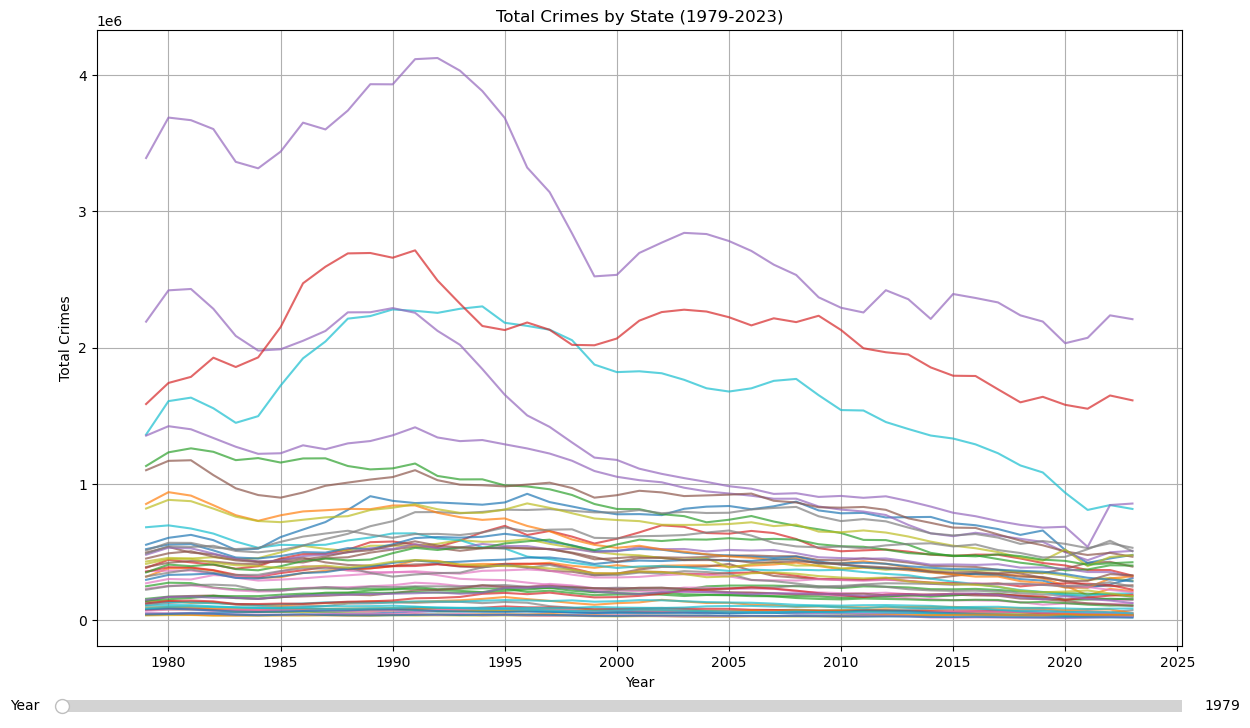

In [88]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Drop rows where 'state' or 'state_abbreviation' is missing
df_crime_filtered = df_crime.dropna(subset=['state_abbr'])

# Convert year column to datetime format
df_crime_filtered['year'] = pd.to_datetime(df_crime_filtered['year'], format='%Y')

# Group by state and year to sum total crimes per state per year
df_statewise = df_crime_filtered.groupby(['year', 'state_abbr'])['Total_Crimes'].sum().reset_index()

# Create figure and axis for plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plot all data initially
line_plots = {}
for state in df_statewise['state_abbr'].unique():
    state_data = df_statewise[df_statewise['state_abbr'] == state]
    line, = ax.plot(state_data['year'], state_data['Total_Crimes'], label=state, alpha=0.7)
    line_plots[state] = line

# Set plot title and labels
ax.set_title("Total Crimes by State (1979-2023)")
ax.set_xlabel("Year")
ax.set_ylabel("Total Crimes")
ax.grid(True)

# Add a slider for year range
ax_slider = plt.axes([0.1, 0.02, 0.8, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Year', df_statewise['year'].min().year, df_statewise['year'].max().year, valinit=df_statewise['year'].min().year, valstep=1)

# Function to update plot based on slider
def update(val):
    selected_year = slider.val
    ax.clear()
    
    # Plot only the data for the selected year
    for state in df_statewise['state_abbr'].unique():
        state_data = df_statewise[df_statewise['state_abbr'] == state]
        filtered_data = state_data[state_data['year'].dt.year == selected_year]
        line_plots[state], = ax.plot(filtered_data['year'], filtered_data['Total_Crimes'], label=state, alpha=0.7)
    
    # Update labels and grid
    ax.set_title(f"Total Crimes by State in {int(selected_year)}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Total Crimes")
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=2, fontsize=8)
    ax.grid(True)
    fig.canvas.draw()

# Call update function when slider value changes
slider.on_changed(update)

# Display plot
plt.show()


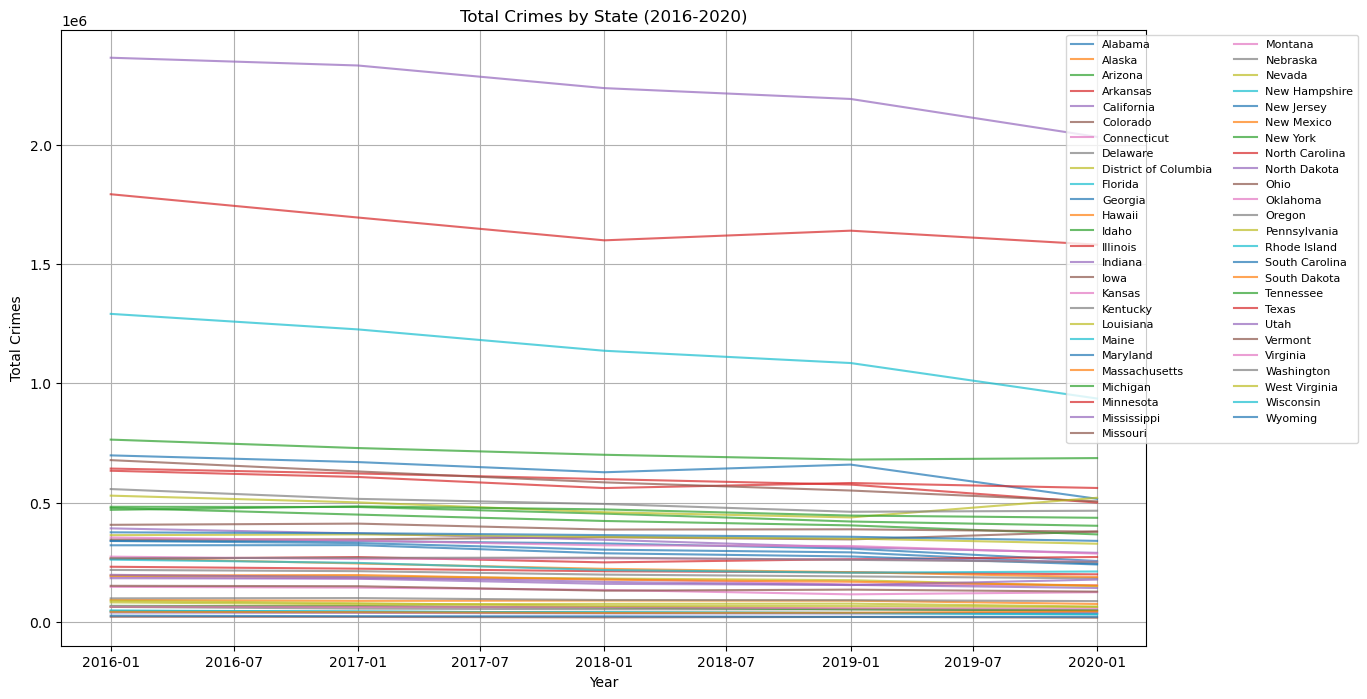

In [ ]:


# Filter data for years between 2016 and 2020
df_filtered_years = df_crime_filtered[(df_crime_filtered['year'].dt.year >= 2016) & (df_crime_filtered['year'].dt.year <= 2020)]

# Group by state and year to sum total crimes per state per year
df_statewise = df_filtered_years.groupby(['year', 'state_name'])['Total_Crimes'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 8))

# Loop through each state and plot its trend
for state in df_statewise['state_name'].unique():
    state_data = df_statewise[df_statewise['state_name'] == state]
    plt.plot(state_data['year'], state_data['Total_Crimes'], label=state, alpha=0.7)

# Set title and labels
plt.title("Total Crimes by State (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=2, fontsize=8)  # Adjust legend position
plt.grid(True)

# Show plot
plt.show()


C:\Users\sahith\AppData\Local\Temp\ipykernel_20016\2160633261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crime_filtered['year'] = pd.to_datetime(df_crime_filtered['year'], format='%Y')


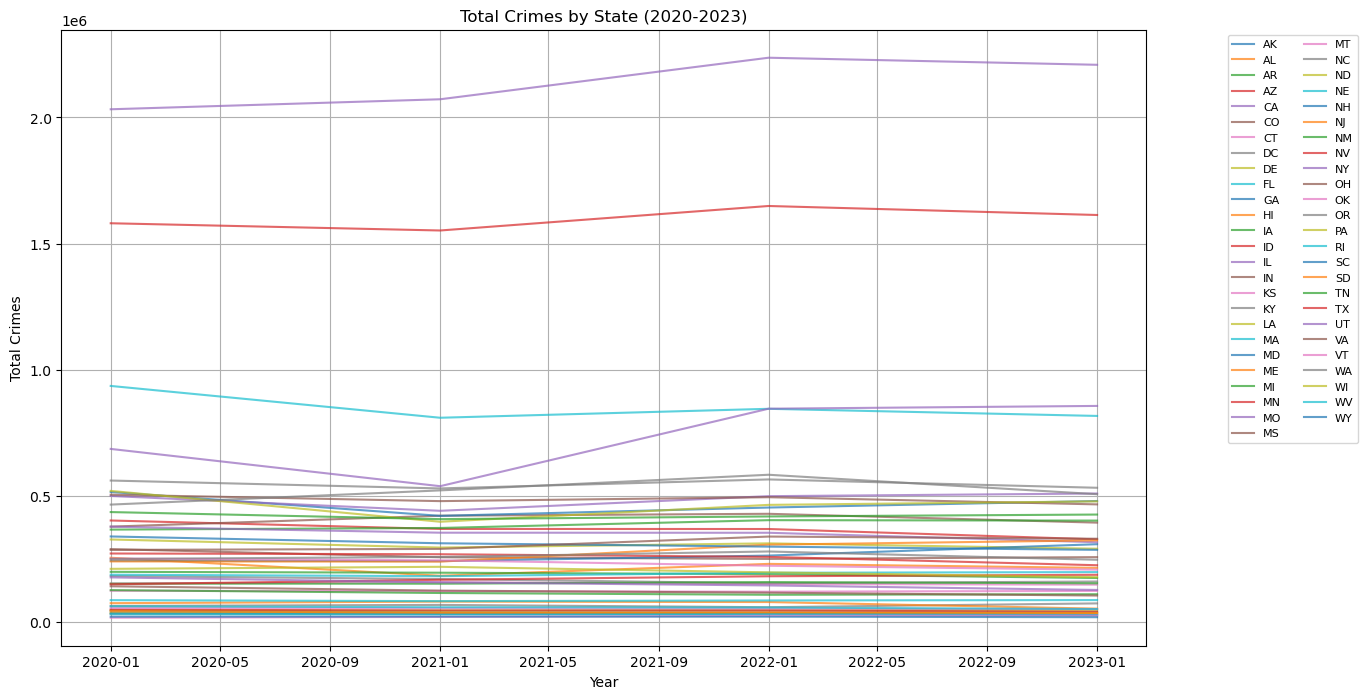

In [ ]:
import matplotlib.pyplot as plt

# Drop rows where 'state' or 'state_abbreviation' is missing
df_crime_filtered = df_crime.dropna(subset=['state_abbr'])

# Ensure the 'year' column is in integer format for filtering
df_crime_filtered['year'] = pd.to_datetime(df_crime_filtered['year'], format='%Y')

# Filter data for years from 2020 to 2023
df_filtered_years = df_crime_filtered[(df_crime_filtered['year'].dt.year >= 2020) & 
                                      (df_crime_filtered['year'].dt.year <= 2023)]


# Group by state and year to sum total crimes per state per year
df_statewise = df_filtered_years.groupby(['year', 'state_abbr'])['Total_Crimes'].sum().reset_index()


# Plot
plt.figure(figsize=(14, 8))

# Loop through each state and plot its trend
for state in df_statewise['state_abbr'].unique():
    state_data = df_statewise[df_statewise['state_abbr'] == state]
    plt.plot(state_data['year'], state_data['Total_Crimes'], label=state, alpha=0.7)

# Set title and labels
plt.title("Total Crimes by State (2020-2023)")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=2, fontsize=8)  # Adjust legend position
plt.grid(True)

# Show plot
plt.show()


### Testing individual crimes ###
While it is sometimes visible, it is diffidult to see if there states are increasing in crime if we just to total. so the following seciton is going to rank the states by crime per capita on

- violent_crime
- homicide
- rape_revised
- robbery
- aggravated_assault
- property_crime
- burglary

In [103]:
df_crime_filtered.tail(20)

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats,Total_Crimes
2316,2023-01-01,NM,NaN,"2,114,371","15,844",244,NaN,"1,114","1,542","12,944","61,052","10,950","39,117","10,985",NaN,153792
2317,2023-01-01,NY,NaN,"19,571,216","76,298",595,NaN,"4,900","20,578","50,225","352,015","29,905","286,473","35,637",NaN,856626
2318,2023-01-01,NC,NaN,"10,835,491","42,408",855,NaN,"3,051","5,617","32,885","223,737","38,500","156,871","28,366",NaN,532290
2319,2023-01-01,ND,NaN,"783,926","2,096",26,NaN,392,203,"1,475","15,217","2,509","10,982","1,726",NaN,34626
2320,2023-01-01,OH,NaN,"11,785,935","33,770",639,NaN,"5,544","5,857","21,730","199,476","27,516","140,210","31,750",NaN,466492
2321,2023-01-01,OK,NaN,"4,053,824","16,770",247,NaN,"2,376","1,510","12,637","87,097","18,586","57,816","10,695",NaN,207734
2322,2023-01-01,OR,NaN,"4,233,358","13,813",189,NaN,"1,711","2,642","9,271","109,672","14,383","77,789","17,500",NaN,246970
2323,2023-01-01,PA,NaN,"12,961,683","34,534",861,NaN,"3,256","8,230","22,187","204,670","17,896","152,449","34,325",NaN,478408
2324,2023-01-01,RI,NaN,"1,095,962","1,839",28,NaN,402,241,"1,168","12,285","1,297","9,452","1,536",NaN,28248
2325,2023-01-01,SC,NaN,"5,373,555","25,312",482,NaN,"1,958","2,108","20,764","117,846","17,263","86,930","13,653",NaN,286316


C:\Users\sahith\AppData\Local\Temp\ipykernel_20016\3937822592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_years['violent_crime'] = df_filtered_years['violent_crime'].replace({',': ''}, regex=True)
C:\Users\sahith\AppData\Local\Temp\ipykernel_20016\3937822592.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_years['violent_crime'] = pd.to_numeric(df_filtered_years['violent_crime'], errors='coerce')


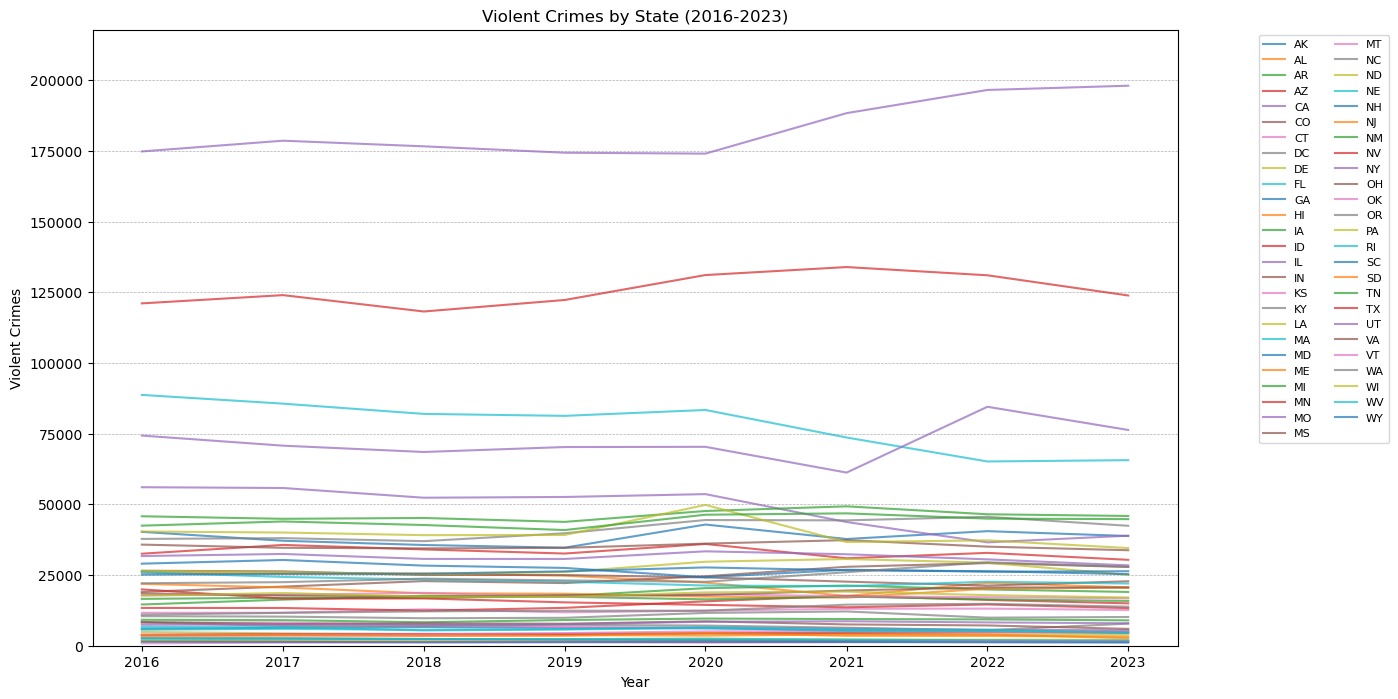

In [ ]:
import matplotlib.pyplot as plt

# Filter data for years from 2016 to 2023
df_filtered_years = df_crime_filtered[(df_crime_filtered['year'].dt.year >= 2016) & 
                                      (df_crime_filtered['year'].dt.year <= 2023)]

# Convert 'violent_crime' to numeric to handle any errors
df_filtered_years['violent_crime'] = df_filtered_years['violent_crime'].replace({',': ''}, regex=True)
df_filtered_years['violent_crime'] = pd.to_numeric(df_filtered_years['violent_crime'], errors='coerce')
df_filtered_years['violent_crime'].tail()

# Group by state and year to sum violent crimes per state per year
df_statewise_violent = df_filtered_years.groupby(['year', 'state_abbr'])['violent_crime'].sum().reset_index()



# Plot
plt.figure(figsize=(14, 8))

# Loop through each state and plot its violent crime trend
for state in df_statewise_violent['state_abbr'].unique():
    state_data = df_statewise_violent[df_statewise_violent['state_abbr'] == state]
    plt.plot(state_data['year'], state_data['violent_crime'], label=state, alpha=0.7)

# Set title and labels
plt.title("Violent Crimes by State (2016-2023)")
plt.xlabel("Year")
plt.ylabel("Violent Crimes")

# Adjust grid settings to make it more readable
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Adjust y-axis limit to focus on the relevant data and reduce congestion
plt.ylim([0, df_statewise_violent['violent_crime'].max() * 1.1])

# Adjust legend position
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=2, fontsize=8)

# Show plot
plt.show()


C:\Users\sahith\AppData\Local\Temp\ipykernel_20016\3171244360.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_years['violent_crime'] = df_filtered_years['violent_crime'].replace({',': ''}, regex=True)
C:\Users\sahith\AppData\Local\Temp\ipykernel_20016\3171244360.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_years['violent_crime'] = pd.to_numeric(df_filtered_years['violent_crime'], errors='coerce')
C:\Users\sahith\AppData\Local\Temp\ipykernel_20016\3171244360.py:12: SettingW

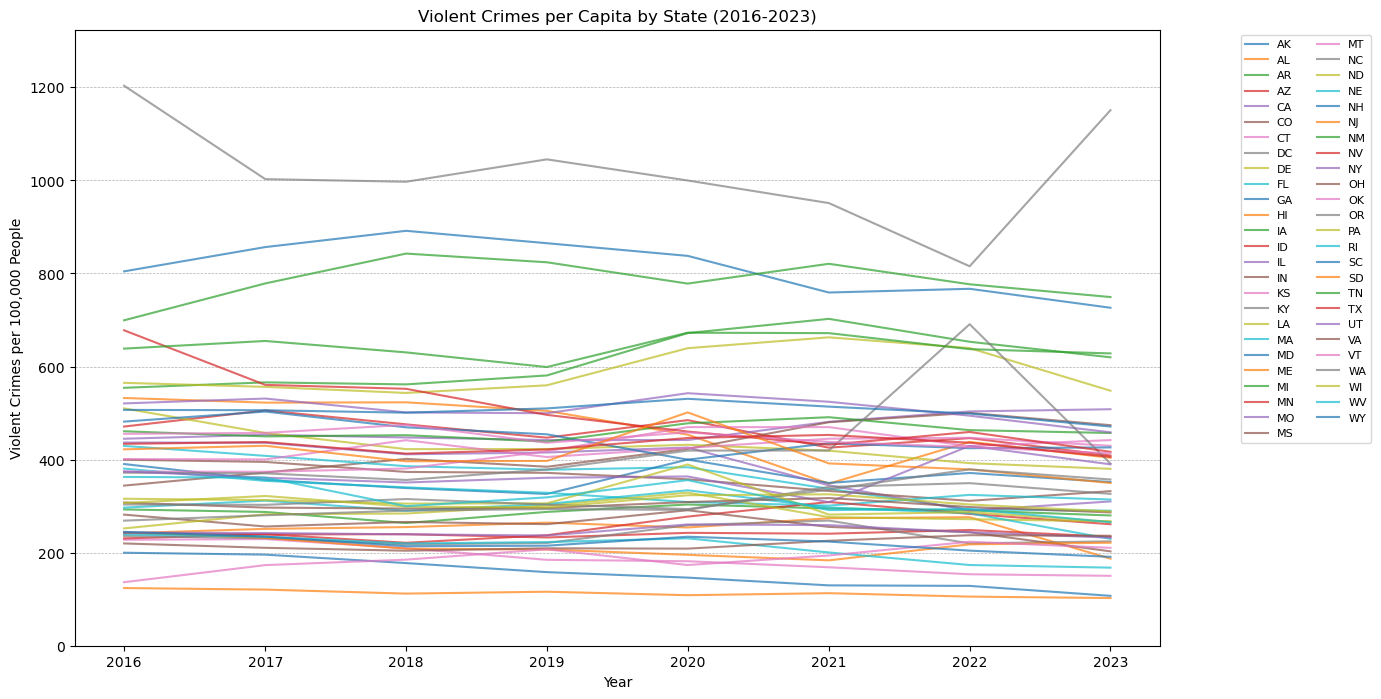

In [109]:
import matplotlib.pyplot as plt

# Filter data for years from 2016 to 2023
df_filtered_years = df_crime_filtered[(df_crime_filtered['year'].dt.year >= 2016) & 
                                      (df_crime_filtered['year'].dt.year <= 2023)]

# Convert 'violent_crime' to numeric to handle any errors
df_filtered_years['violent_crime'] = df_filtered_years['violent_crime'].replace({',': ''}, regex=True)
df_filtered_years['violent_crime'] = pd.to_numeric(df_filtered_years['violent_crime'], errors='coerce')

# Convert 'population' to numeric to handle any errors
df_filtered_years['population'] = df_filtered_years['population'].replace({',': ''}, regex=True)
df_filtered_years['population'] = pd.to_numeric(df_filtered_years['population'], errors='coerce')

# Calculate per capita violent crime: violent crimes per population (scaled by 100,000 for better visibility)
df_filtered_years['violent_crime_per_capita'] = (df_filtered_years['violent_crime'] / df_filtered_years['population']) * 100000

# Group by state and year to sum per capita violent crimes per state per year
df_statewise_violent_per_capita = df_filtered_years.groupby(['year', 'state_abbr'])['violent_crime_per_capita'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 8))

# Loop through each state and plot its violent crime per capita trend
for state in df_statewise_violent_per_capita['state_abbr'].unique():
    state_data = df_statewise_violent_per_capita[df_statewise_violent_per_capita['state_abbr'] == state]
    plt.plot(state_data['year'], state_data['violent_crime_per_capita'], label=state, alpha=0.7)

# Set title and labels
plt.title("Violent Crimes per Capita by State (2016-2023)")
plt.xlabel("Year")
plt.ylabel("Violent Crimes per 100,000 People")

# Adjust grid settings to make it more readable
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Adjust y-axis limit to focus on the relevant data and reduce congestion
plt.ylim([0, df_statewise_violent_per_capita['violent_crime_per_capita'].max() * 1.1])

# Adjust legend position
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=2, fontsize=8)

# Show plot
plt.show()


### building the models ##

In [116]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


def plot_violent_crime_per_capita(df_crime_filtered, crime_column: str, start_year: int = 2016, end_year: int = 2023):
    # Filter data for the specified years
    df_filtered_years = df_crime_filtered[(df_crime_filtered['year'].dt.year >= start_year) & 
                                          (df_crime_filtered['year'].dt.year <= end_year)]

    # Convert crime column to numeric to handle any errors
    df_filtered_years[crime_column] = df_filtered_years[crime_column].replace({',': ''}, regex=True)
    df_filtered_years[crime_column] = pd.to_numeric(df_filtered_years[crime_column], errors='coerce')

    # Convert 'population' to numeric to handle any errors
    df_filtered_years['population'] = df_filtered_years['population'].replace({',': ''}, regex=True)
    df_filtered_years['population'] = pd.to_numeric(df_filtered_years['population'], errors='coerce')

    # Calculate per capita crime (scaled by 100,000 for better visibility)
    df_filtered_years[f'{crime_column}_per_capita'] = (df_filtered_years[crime_column] / df_filtered_years['population']) * 100000

    # Group by state and year to sum per capita crimes per state per year
    df_statewise_crime_per_capita = df_filtered_years.groupby(['year', 'state_abbr'])[f'{crime_column}_per_capita'].sum().reset_index()

    # Calculate total crime per state across all years in the filtered range to sort the legend
    total_crimes_per_state = df_statewise_crime_per_capita.groupby('state_abbr')[f'{crime_column}_per_capita'].sum().reset_index()
    total_crimes_per_state = total_crimes_per_state.sort_values(by=f'{crime_column}_per_capita', ascending=False)

    # Plot
    plt.figure(figsize=(14, 8))

    # Loop through each state in sorted order and plot its crime per capita trend
    for state in total_crimes_per_state['state_abbr']:
        state_data = df_statewise_crime_per_capita[df_statewise_crime_per_capita['state_abbr'] == state]
        plt.plot(state_data['year'], state_data[f'{crime_column}_per_capita'], label=state, alpha=0.7)

    # Set title and labels
    plt.title(f"{crime_column.replace('_', ' ').title()} per Capita by State ({start_year}-{end_year})")
    plt.xlabel("Year")
    plt.ylabel(f"{crime_column.replace('_', ' ').title()} per 100,000 People")

    # Adjust grid settings to make it more readable
    plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

    # Adjust y-axis limit to focus on the relevant data and reduce congestion
    plt.ylim([0, df_statewise_crime_per_capita[f'{crime_column}_per_capita'].max() * 1.1])

    # Adjust legend position
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=2, fontsize=8)

    # Show plot
    plt.show()


   year state_abbr state_name population violent_crime homicide  rape_legacy  \
0  1979        NaN        NaN  220099000       1208030    21460      76390.0   
1  1979         AK     Alaska     406000          1994       54        292.0   
2  1979         AL    Alabama    3769000         15578      496       1037.0   
3  1979         AR   Arkansas    2180000          7984      198        595.0   
4  1979         AZ    Arizona    2450000         14528      219       1120.0   

  rape_revised robbery aggravated_assault property_crime burglary  larceny  \
0          NaN  480700             629480       11041500  3327700  6601000   
1          NaN     445               1203          23193     5616    15076   
2          NaN    4127               9918         144372    48517    83791   
3          NaN    1626               5565          70949    21457    45267   
4          NaN    4305               8884         177977    48916   116976   

  motor_vehicle_theft caveats  Total_Crimes  
0   

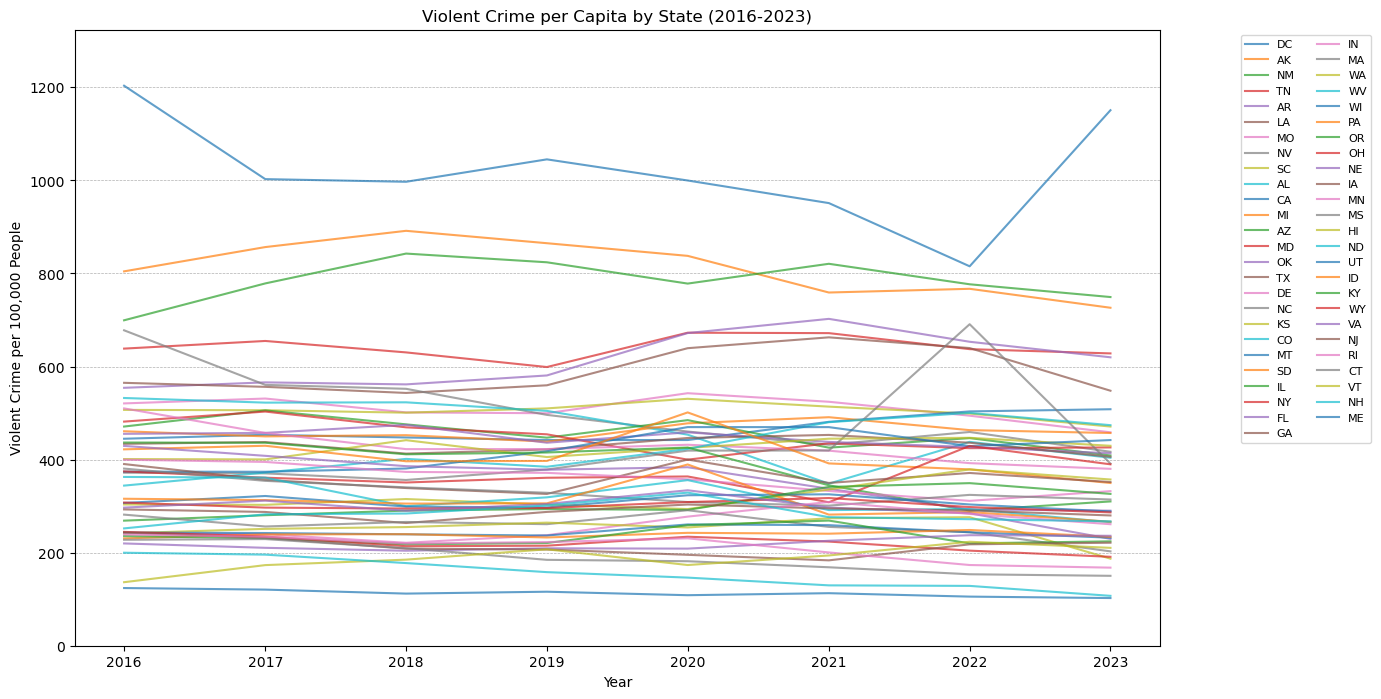

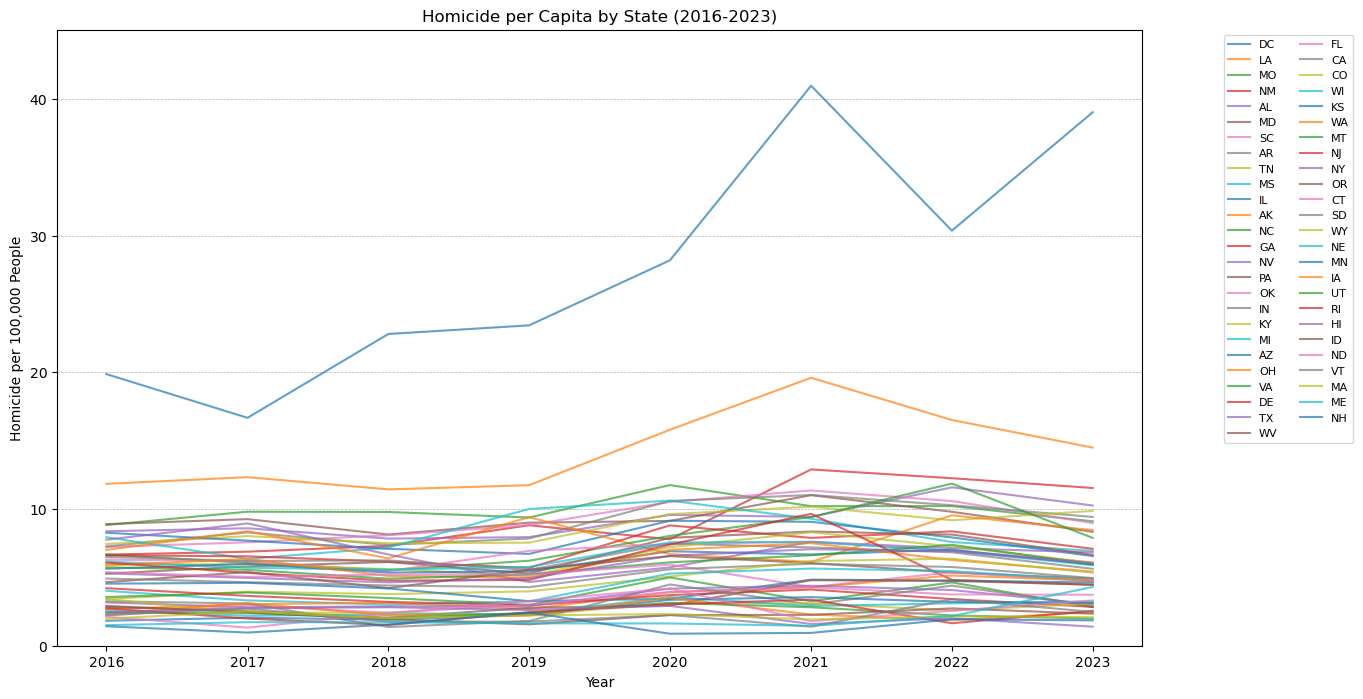

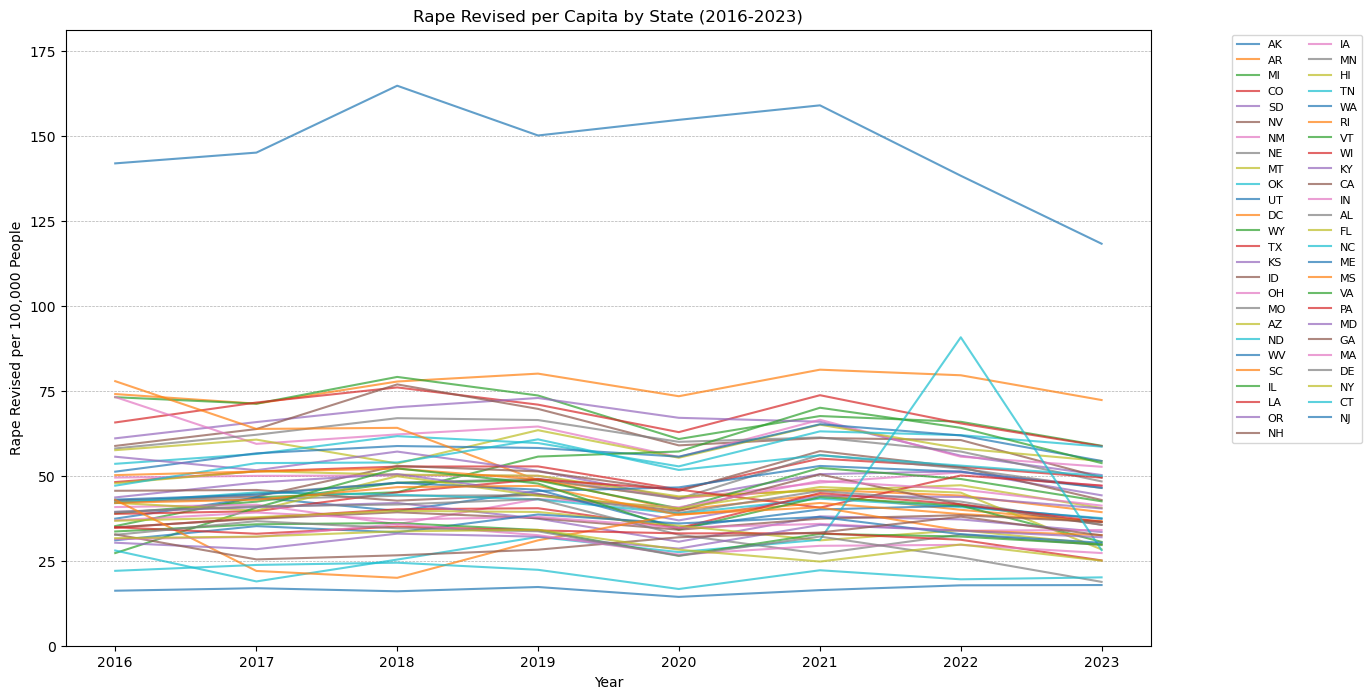

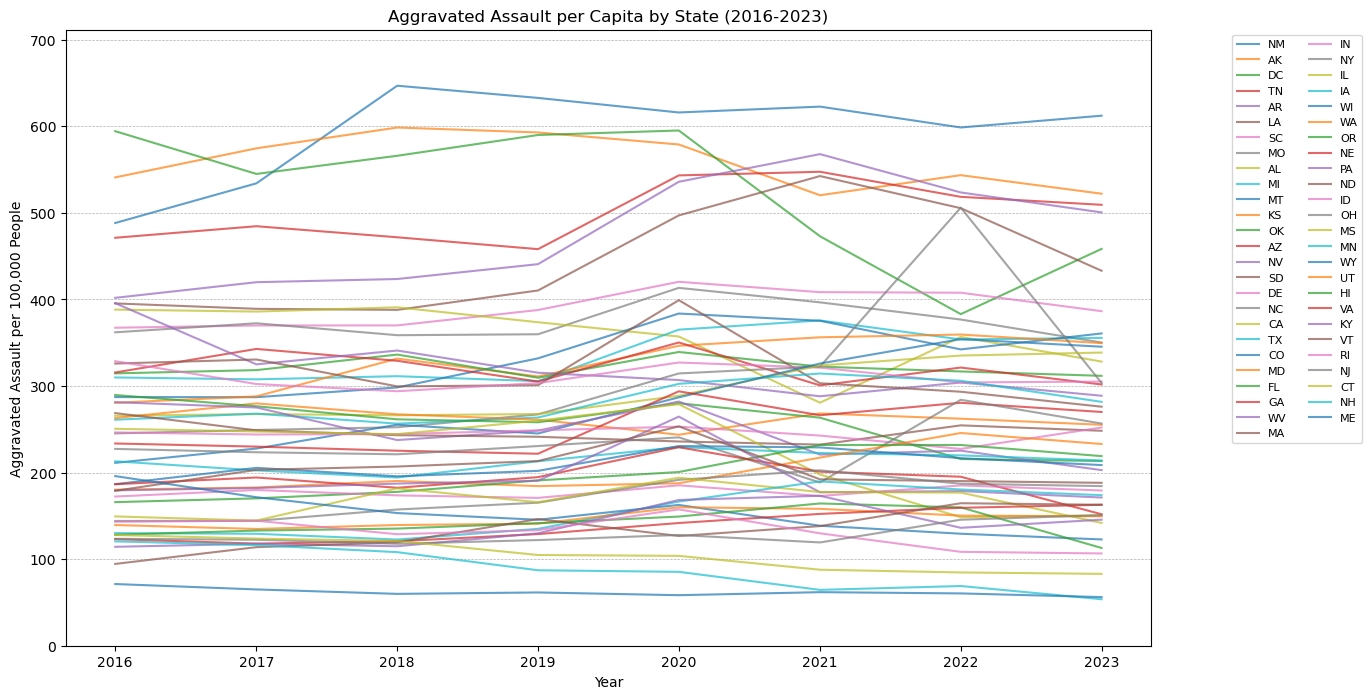

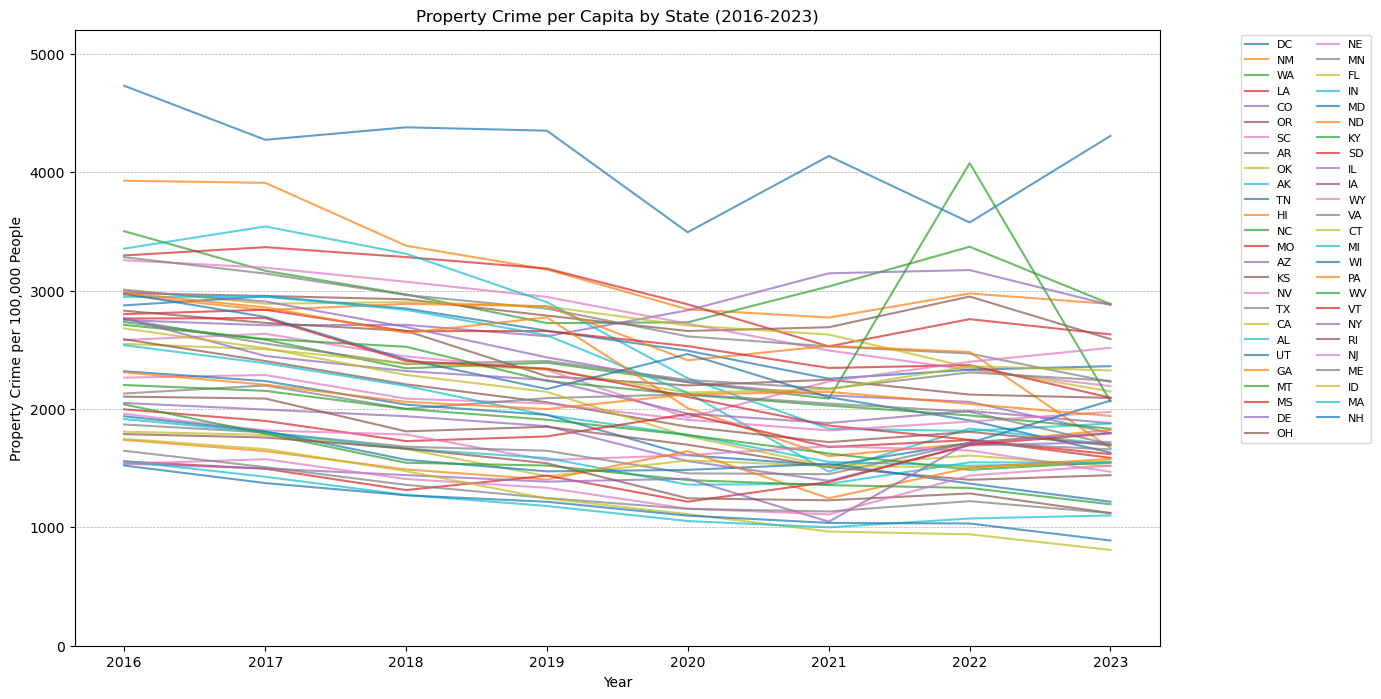

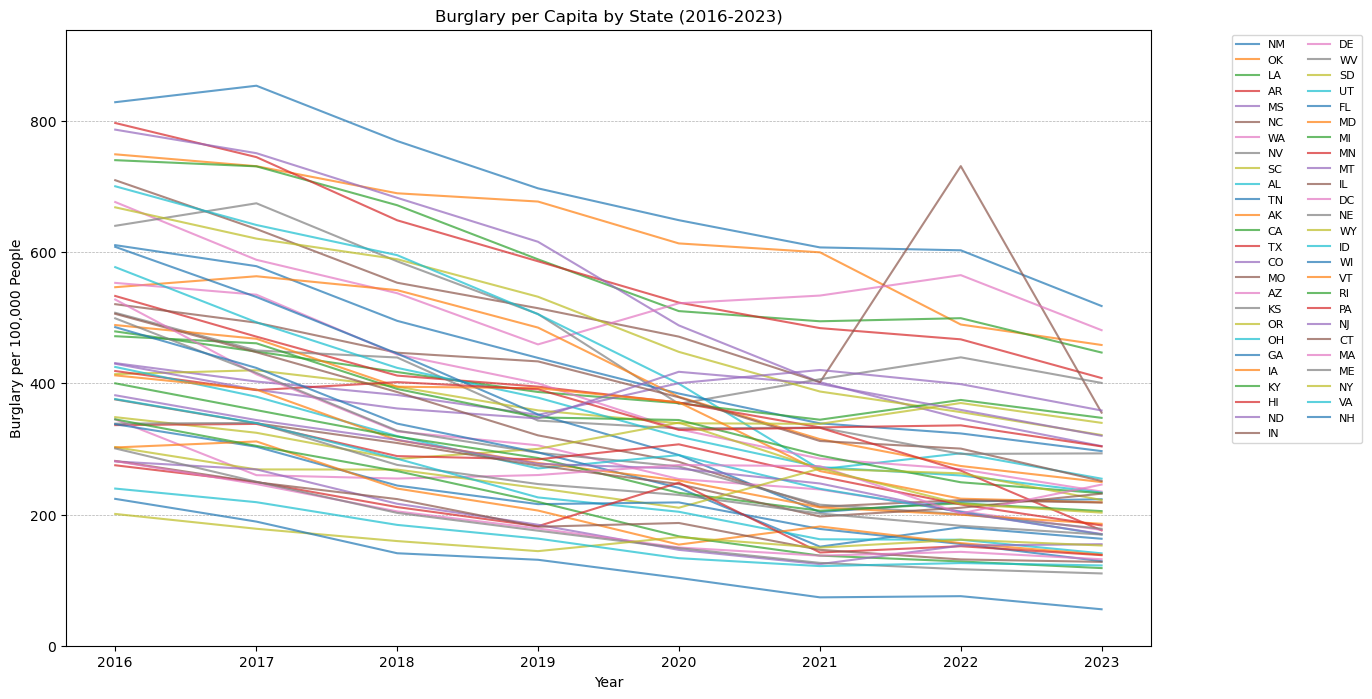

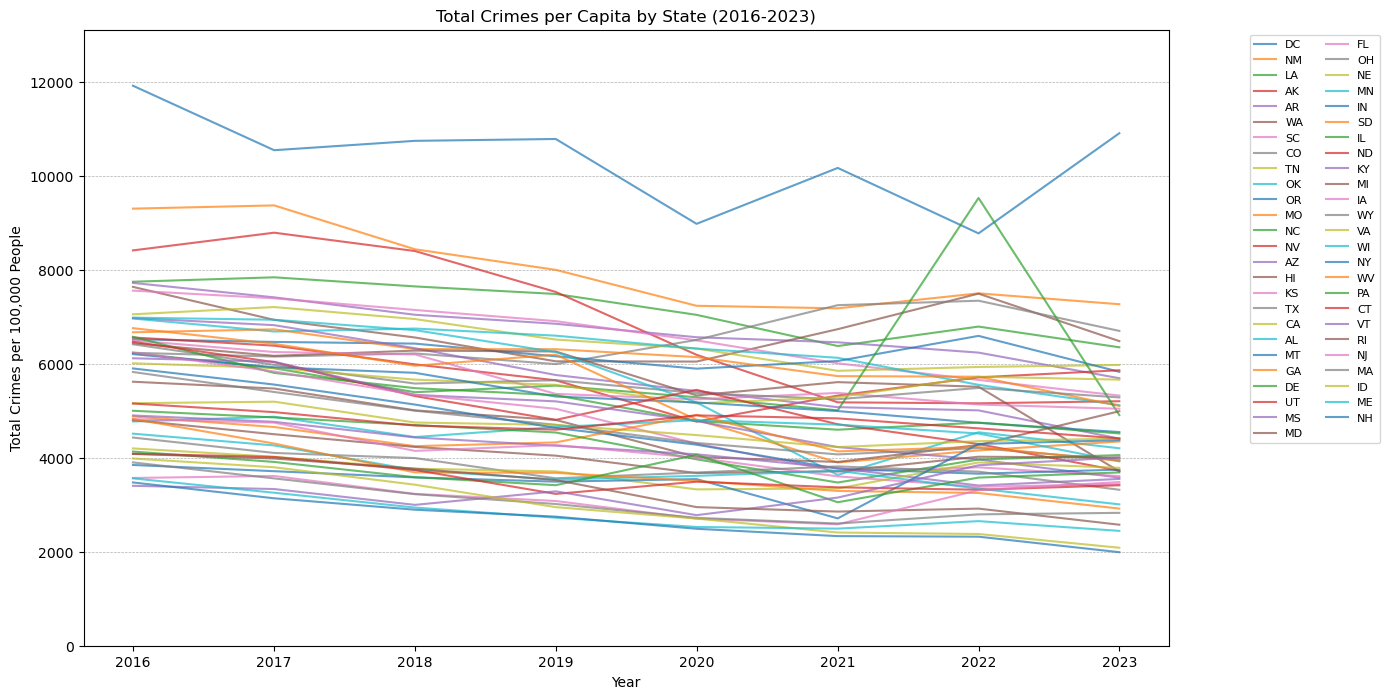

In [ ]:
# Load the CSV file into a DataFrame
df_crime = pd.read_csv("Data/estimated_crimes_1979_2023.csv")

# Display the first 5 rows
print(df_crime.head())

df_crime_filtered = df_crime.dropna(subset=['state_abbr'])

# Convert year column to datetime format
df_crime_filtered['year'] = pd.to_datetime(df_crime_filtered['year'], format='%Y')


# - violent_crime
# - homicide
# - rape_revised
# - robbery
# - aggravated_assault
# - property_crime
# - burglary

# For violent crime
plot_violent_crime_per_capita(df_crime_filtered, 'violent_crime')
plot_violent_crime_per_capita(df_crime_filtered, 'homicide')
plot_violent_crime_per_capita(df_crime_filtered, 'rape_revised')
plot_violent_crime_per_capita(df_crime_filtered, 'aggravated_assault')
plot_violent_crime_per_capita(df_crime_filtered, 'property_crime')
plot_violent_crime_per_capita(df_crime_filtered, 'burglary')
plot_violent_crime_per_capita(df_crime_filtered, 'Total_Crimes')


### summary

The higher you are on the ranking for each of these criterias the more dangerous it is for investing in a long term asset in those states. We have tried to provide a city based information but there is not central place where we could accuire the us data by city.
if you find it, Please let us know becuase I want to work on it. 



### Limitations

This approach only takes into consideration of the state as a whole and you could find an invementment or cities where the cime rates are actually lower. 
So while this is a just a overarching study, it is no means of indication that a good investment could be found in a higher rancked crime states it is just less likely and needs more invester disgressions. 

## Asset Appriciation

in this section we want to find states and citis where the price of the asset is raising and so is the price of rents in such a way that it makes sense to invest into these cities.

we can see if the realestate asset is a good invement if 
-   There is a good increase in population(child birth) -> future growth potential
-   There is a good inflow of people who will come back to the place (https://www.census.gov/data/tables/time-series/demo/geographic-mobility/state-to-state-migration.html)
-   The price of the assets is raising over the past few years at a good pace
-   High Rent to asset valuation ratio.

## Taxsation

## Risk Mitigation

## Model Development